# **PRODUCT REVIEW SENTIMENT ANALYSIS**



In [1]:
pip install scikit-learn

In [2]:
#used for the visualization of the words present in the data
!pip install wordcloud


In [3]:
#used for sentiment analysis
!pip install vaderSentiment

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

#powerful tool for saving Python objects to disk
import pickle

# powerful tools for pattern matching and string manipulation
import re


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **1.DATA EXPLORATION & MODELING**

In [5]:
data=pd.read_csv('/content/Review_Data.csv')

In [6]:
print(f"Dataset shape :{data.shape}")

Dataset shape :(3150, 5)


In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [10]:
#getting the record where 'verified_reviews' is null
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
#dropping null values
data.dropna(inplace=True)

In [12]:
print(f"Dataset shape :{data.shape}")

Dataset shape :(3149, 5)


In [13]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64


In [14]:
#Distinct values of 'rating' and its count
print(f"Rating value count : \n{data['rating'].value_counts()}")

Rating value count : 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


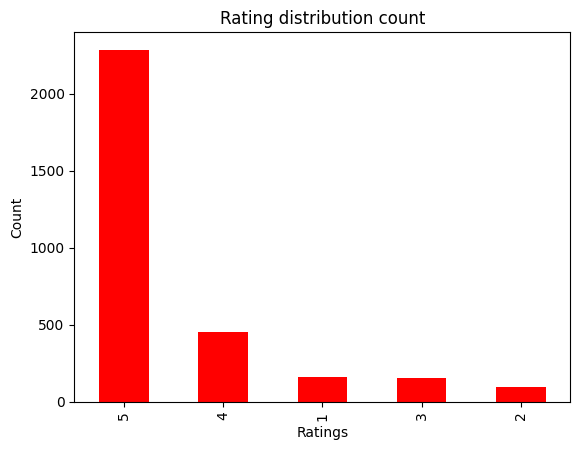

In [15]:
#Bar plot to visualize the total counts of each rating
data['rating'].value_counts().plot.bar(color='red')
plt.title("Rating distribution count")
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [16]:
#Finding the percentage distribution of each string
print(f"Rating value count - percentage distribution :\n {round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution :
 rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


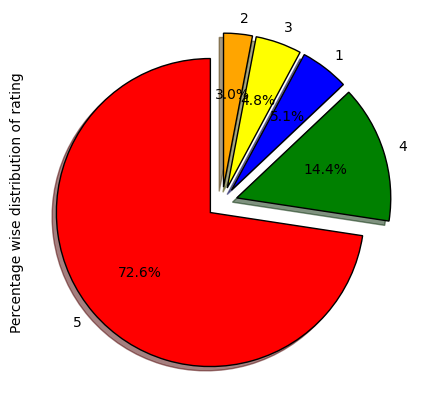

In [17]:
#Pie chart
fig=plt.figure(figsize=(5,5))
colors=('red','green','blue','yellow','orange')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage wise distribution of rating')
from io import BytesIO
graph=BytesIO()
fig.savefig(graph,format="png")

In [18]:
#Distinct values of 'feedback' and its count
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

#Finding the percentage distribution of each feedbacks
print(f"Feedback value count - percentage distribution : \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64
Feedback value count - percentage distribution : 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


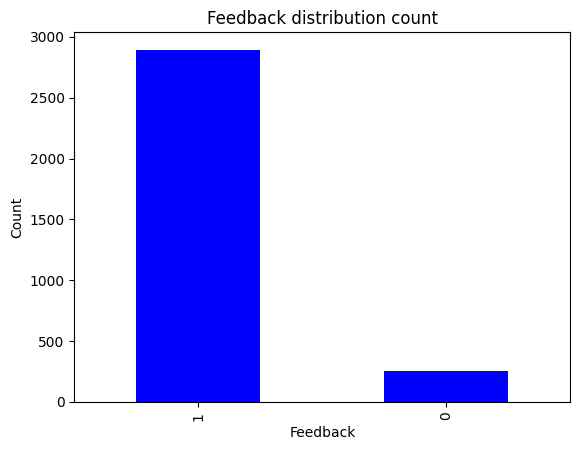

In [19]:
#Bar graph to visualize the total counts of each feedback
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distribution of feedback'>

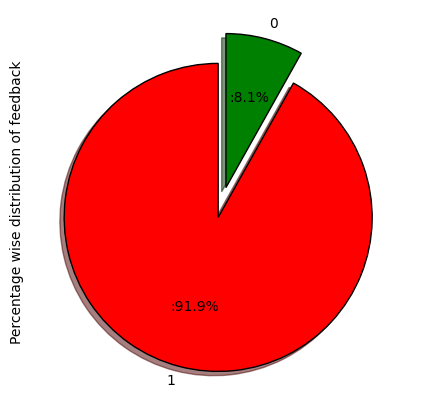

In [20]:
fig=plt.figure(figsize=(5,5))
colors=('red','green')
wp={'linewidth':1,"edgecolor":"black"}
tags=data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',autopct=":%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label="Percentage wise distribution of feedback")

In [21]:
 #convert the collection of text into matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer()- we take the textual data and convert it into vector representations
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

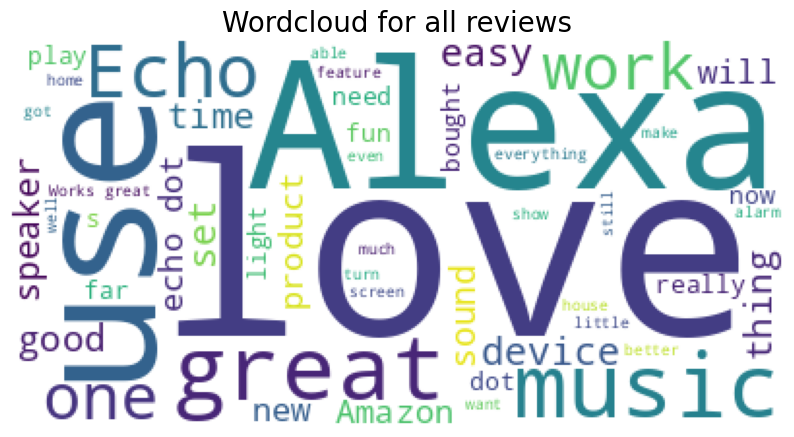

In [22]:
from wordcloud import WordCloud

#Combine all reviews
reviews=" ".join([review for review in data['verified_reviews']])

#Initialize worldcloud object
wc=WordCloud(background_color='white',max_words=50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews',fontsize=20)
plt.axis('off')
plt.show()

In [23]:
#Combine all reviews for each feedback category and splitting them into induvidual words
neg_reviews=" ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

unique_positive=[x for x in pos_reviews if x not in neg_reviews]
unique_positive=" ".join(unique_positive)

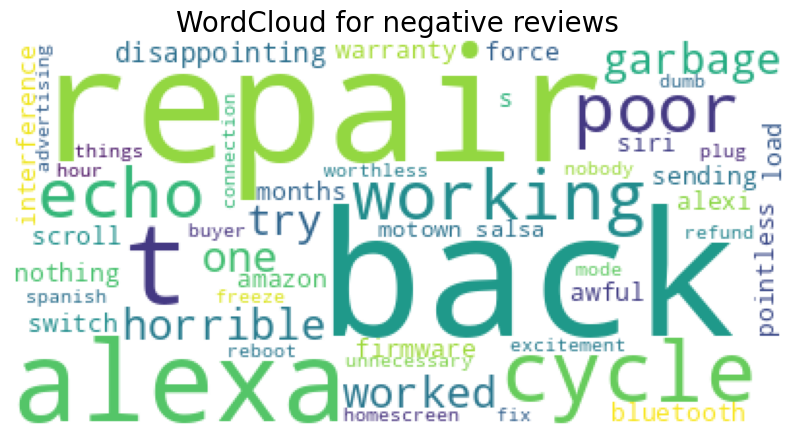

In [24]:
wc=WordCloud(background_color='white',max_words=50)

#Generate and plot wordcloud -negative reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews',fontsize=20)
plt.axis('off')
plt.show()

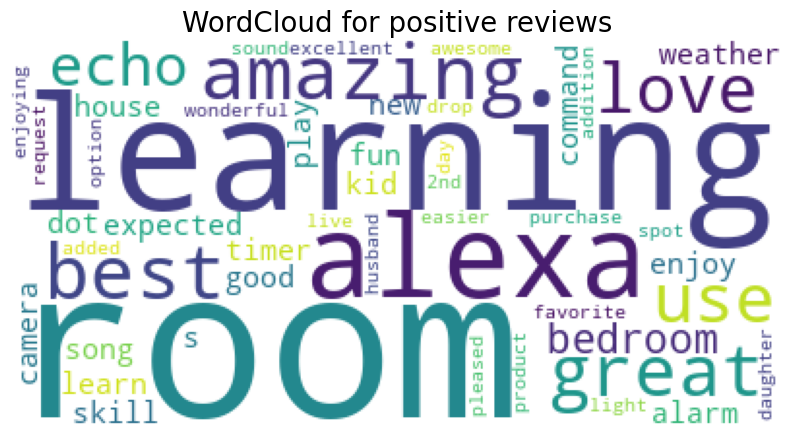

In [25]:
wc=WordCloud(background_color='white',max_words=50)

#Generate and plot wordcloud -positive reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews',fontsize=20)
plt.axis('off')
plt.show()


# **2.PREPROCESSING AND MOELLING**
---
1.Replace any non alphabet characters with a space



2.Covert to lower case and split into words





3.Iterate over the induvidual words and if it is not a stopward then add the stemmed form of the word to the corpus



In [26]:
#process of reducing words to their base or root form
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

#use to remove common words
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))

corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
  review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
  review=review.lower().split()
  review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Using CountVectorizer to create bag of words
cv=CountVectorizer(max_features=2500)

#storing dependent and independent variables in x and y
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [28]:
import os
# Create the directory if it doesn't exist
os.makedirs('Models', exist_ok=True)

#saving the countvectorizer
pickle.dump(cv,open('Models/countVectorizer.pkl','wb'))

In [29]:
#checking the shape of x and y
print(f"X shape : {x.shape}")
print(f"Y shape : {y.shape}")

X shape : (3149, 2500)
Y shape : (3149,)


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
print(f"X train :{x_train.shape}")
print(f"Y train :{y_train.shape}")
print(f"X test :{x_test.shape}")
print(f"Y test :{y_test.shape}")



X train :(2204, 2500)
Y train :(2204,)
X test :(945, 2500)
Y test :(945,)


# **3.SCALING**

In [31]:
#minimize the value between 0 and 1 by scaling
from sklearn.preprocessing import MinMaxScaler

#scaling xtest and x train so that all values are between 0 and 1 scaler
scaler=MinMaxScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.transform(x_test)

In [32]:
#saving the scaler model
pickle.dump(scaler,open('Models/scaler.pkl','wb'))

# **4.MODEL BUILDING**

In [33]:
#evaluating the performance of the classification model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,roc_curve,auc



# **4.1 RANDOM FOREST**

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Fitting scaled x_train and y_train on Random Forest Classifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)


RandomForestClassifier()

In [35]:
#Predicting on the test set
y_preds=model_rf.predict(x_test_scl)

print("Classification Report:\n", classification_report(y_test, y_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.37      0.51        78
           1       0.95      0.99      0.97       867

    accuracy                           0.94       945
   macro avg       0.88      0.68      0.74       945
weighted avg       0.93      0.94      0.93       945



In [36]:
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

Accuracy: 0.9407407407407408



Confusion Matrix :


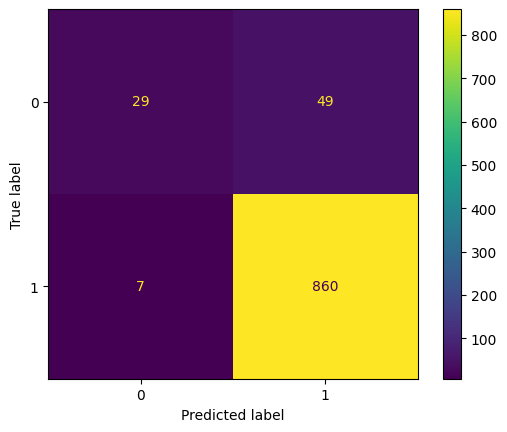


Confusion Matrix :
[[ 29  49]
 [  7 860]]


In [37]:
#confusion matrix
print("\nConfusion Matrix :")
cm=confusion_matrix(y_test,y_preds)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

print("\nConfusion Matrix :")
print(confusion_matrix(y_test,y_preds))

## **4.2 LOGISTIC REGRESSION**

In [38]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_scl,y_train)

LogisticRegression()

Logistic Regression
Accuracy : 0.9396825396825397

Confusion Matrix :


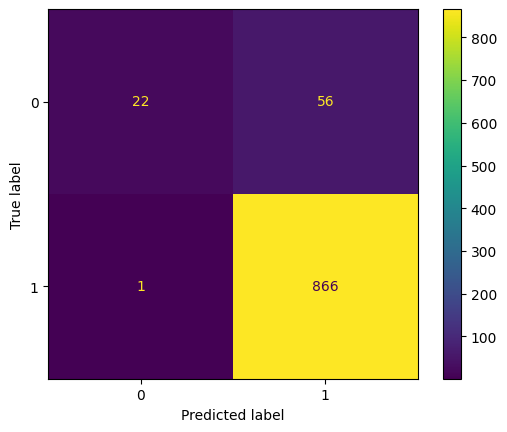


 Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.28      0.44        78
           1       0.94      1.00      0.97       867

    accuracy                           0.94       945
   macro avg       0.95      0.64      0.70       945
weighted avg       0.94      0.94      0.92       945



In [39]:
y_pred=lr.predict(x_test_scl)
print("Logistic Regression")
print("Accuracy :",accuracy_score(y_test,y_pred))

print("\nConfusion Matrix :")
con_mat=confusion_matrix(y_test,y_pred)
con_mat_display=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=model_rf.classes_)
con_mat_display.plot()
plt.show()

print("\n Classification Report :")
print(classification_report(y_test,y_pred))

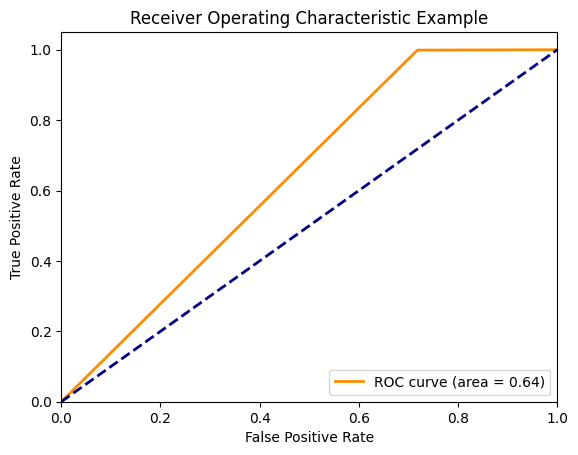

In [40]:
# ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


# **4.3 XgBoost**

In [41]:
pip install --upgrade xgboost

In [42]:
pip install scikit-learn==1.6.0

In [56]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_hgb = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1)
model_hgb.fit(x_train_scl, y_train)

HistGradientBoostingClassifier()

In [59]:
y_predicts=model_hgb.predict(x_test_scl)

In [60]:
accu = accuracy_score(y_test, y_predicts)
print("Accuracy:", accu)

Accuracy: 0.9386243386243386


In [61]:
#ability to handle large datasets
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

class FixedXGBClassifier(XGBClassifier, BaseEstimator, ClassifierMixin):
    def __sklearn_tags__(self):
        return {}

model_xgb = XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=100, learning_rate=0.1)
model_xgb.fit(x_train_scl,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [62]:
y_predict=model_xgb.predict(x_test_scl)

In [63]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9343915343915344


In [64]:
print("\n Classification Report :")
print(classification_report(y_test,y_predict))


 Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.29      0.43        78
           1       0.94      0.99      0.97       867

    accuracy                           0.93       945
   macro avg       0.85      0.64      0.70       945
weighted avg       0.93      0.93      0.92       945



[[ 23  55]
 [  7 860]]

Confusion Matrix :


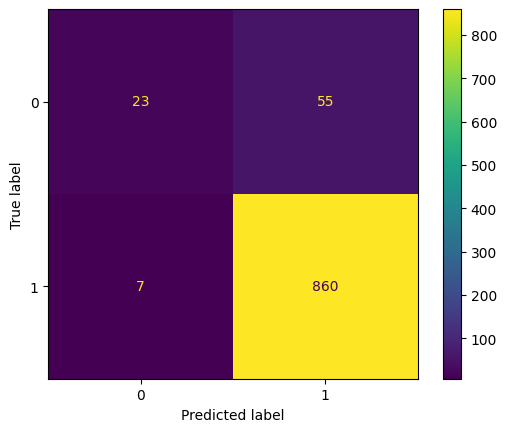

In [49]:
#Confusion matrix
c_m=confusion_matrix(y_test,y_predict)
print(c_m)
print("\nConfusion Matrix :")
c_m=confusion_matrix(y_test,y_predict)
c_m_display=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=model_rf.classes_)
c_m_display.plot()
plt.show()

In [50]:
#Saving the xgboost classifier
pickle.dump(model_xgb,open('Models/model_xgb.pkl','wb'))

In [54]:
#evaluates the intensity of texts
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    print(f"Sentiment: {sentiment}")

# Input sentence
sentence = input("Enter a sentence: ")
analyze_sentiment(sentence)


Enter a sentence: its nice
Sentiment: Positive
